## Models
The following multiple linear regression model will be entertained:

\begin{align}
Y =1+2X_{1} +3X_{2} +\epsilon,
\end{align}

where $\epsilon$ has a $N(0,1)$ distribution.



## Data Generation
Generate a dataset with correlations $\rho$ 0.50.

In [157]:
generate_data <- function(rhos, n_samples, normal = F, l1, l2) {
    len = length(rhos)
    x1 = x2 = z1 = z2 = y = matrix(rep(NA, n_samples*len), ncol=len)
    
    for (i in 1:len) {
        if (normal) {
            x1[, i] = z1[, i] = rnorm(n_samples)
            z2[, i] = rnorm(n_samples)
        } else {
            x1[, i] = z1[, i] = runif(n_samples, l1, -l1)
            z2[, i] = runif(n_samples, l2, -l2)
        }

        x2[, i] = rhos[i]*z1[, i] + (1-rhos[i])*z2[, i]
        epsilon = rnorm(n_samples)
        y[, i] = 1 + 2*x1[, i] + 3*x2[, i] + epsilon
    }
    
    return(list(y=y, x1=x1, x2=x2, z1=z1, z2=z2))
}

rhos = c(.5)
dat = generate_data(rhos = rhos, n_samples = 100, normal = T, l1=-10, l2=-5)
y = unname(dat$y)[, 1]
x1 = unname(dat$x1)[, 1]
x2 = unname(dat$x2)[, 1]
z1 = unname(dat$z1)[, 1]
z2 = unname(dat$z2)[, 1]

## Plot of $X_{1}$ vs. $X_{2}$

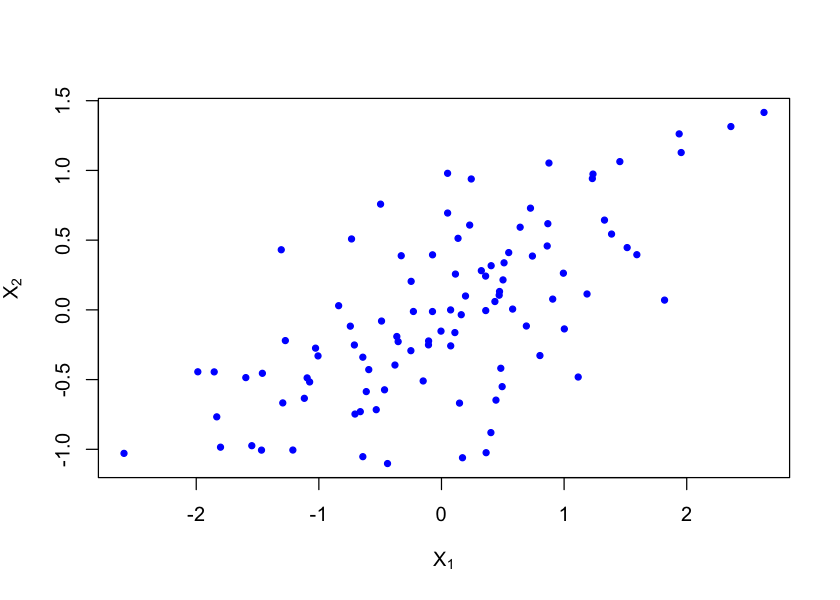

In [158]:
options(repr.plot.height=5)
plot(x1, x2, pch=20, col='blue', xlab=expression('X'[1]), ylab=expression('X'[2]))

## Regression $X_{2}$ on $X_{1}$

In [159]:
model = lm(x2~x1)
model.summ = summary(model)
model.summ


Call:
lm(formula = x2 ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13146 -0.24899  0.00307  0.31396  1.00029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04009    0.04574  -0.877    0.383    
x1           0.40497    0.04580   8.843 3.91e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4572 on 98 degrees of freedom
Multiple R-squared:  0.4438,	Adjusted R-squared:  0.4381 
F-statistic:  78.2 on 1 and 98 DF,  p-value: 3.91e-14


## Residuals vs. Regressors Plot

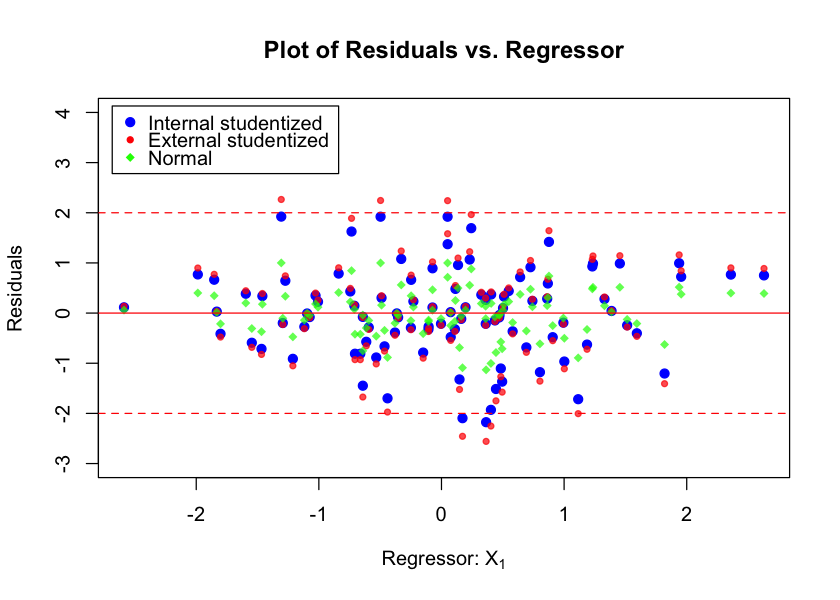

In [160]:
plot(x1, model.summ$residuals / 0.5201, pch=19, col='blue', ylim=c(-3, 4),
     xlab=expression('Regressor: X'[1]), ylab='Residuals', main='Plot of Residuals vs. Regressor')
points(x1, rstudent(model), pch=20, col=rgb(1, 0, 0, .7))
points(x1, model.summ$residuals, pch=18, col=rgb(0, 1, 0, .7), cex=1)
abline(h=0, col='red')
abline(h=2, col='red', lty=2)
abline(h=-2, col='red', lty=2)

legend('topleft', col=c('blue', 'red', 'green'), inset=0.02, pch=c(19, 20, 18),
       legend=c('Internal studentized', 'External studentized', 'Normal'), y.intersp=1.2)
 

## Adding Outliers

In [161]:
x1[101] = 0.125
x2[101] = model$coefficients[1] + model$coefficients[2] * x1[101]
x2[101]
if (x2[101] > 0) {
    x2[101] = x2[101] + 5
} else {
    x2[101] = x2[101] - 5
}
x2[101]

[1] 0.01053093

[1] 5.010531

## Plot of $X_{2}$ on $X_{1}$

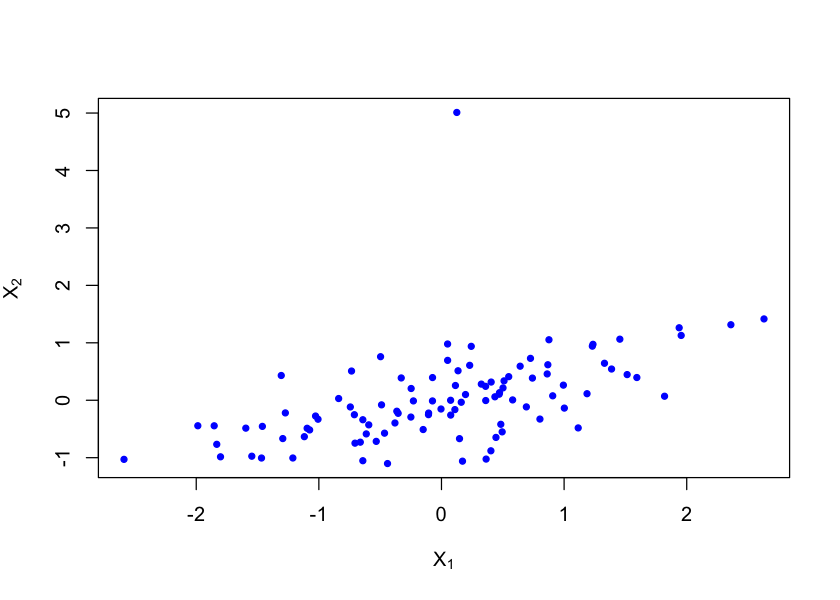

In [162]:
options(repr.plot.height=5)
plot(x1, x2, pch=20, col='blue', xlab=expression('X'[1]), ylab=expression('X'[2]))

## Regression $X_{2}$ on $X_{1}$ with the Outlier Added

In [163]:
model = lm(x2~x1)
model.summ = summary(model)
model.summ


Call:
lm(formula = x2 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1827 -0.2984 -0.0402  0.2925  4.9500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.009294   0.067282   0.138     0.89    
x1          0.410048   0.067701   6.057 2.51e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.676 on 99 degrees of freedom
Multiple R-squared:  0.2704,	Adjusted R-squared:  0.263 
F-statistic: 36.68 on 1 and 99 DF,  p-value: 2.511e-08
